In [1]:
import numpy as np
from tr_functions.general import GeneralModel
from tr_functions.gaussian import GaussianModel
from tr_functions.kppv import KppvModel
from tr_functions.parzen import ParzenModel
from tr_functions.linear import LinearSeparationModel

In [2]:
split_data_tp1_app = GeneralModel.open_file('data/data_tp1_app.txt')
split_data_tp1_dec = GeneralModel.open_file('data/data_tp1_dec.txt')

split_data_tp2_app = GeneralModel.open_file('data/data_tp2_app.txt')
split_data_tp2_dec = GeneralModel.open_file('data/data_tp2_dec.txt')

split_data_tp3_app = GeneralModel.open_file('data/data_tp3_app.txt')
split_data_tp3_dec = GeneralModel.open_file('data/data_tp3_dec.txt')

## Analyse visuelle
### Dataset 1

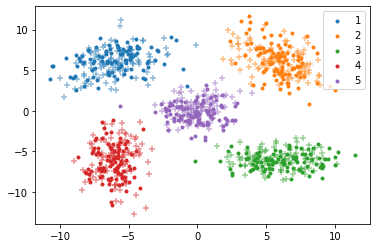

In [3]:
general = GeneralModel()
general.train_data = split_data_tp1_app
general.test_data = split_data_tp1_dec
general.plot_all_data()

On remarque que les jeux de données d'apprentissage (croix plus claires) et de test (points sombres) se superposent relativement bien a l'exception de quelques outliers dans chaque classe. Normalement les différents modèles devraient séparer les classes avec une bon niveau de confiance. Dans cet exemple, la séparation des classes peut se faire manuellement. 

### Dataset 2

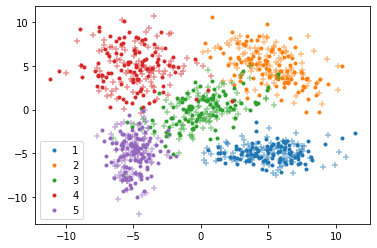

In [4]:
general = GeneralModel()
general.train_data = split_data_tp2_app
general.test_data = split_data_tp2_dec
general.plot_all_data()

Contrairement au premier jeu de données, les classes semblent plus diffusent que ce soit pour les jeux d'apprentissage et de test. En revanche on remarque que les classes sont constante entre les deux jeux de données. Les résultats des différents modèles seront moins bon que pour le premier jeu. La séparation des classes peut se faire manuellement avec quelques difficultés.

### Dataset 3

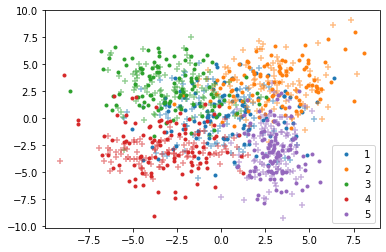

In [5]:
general = GeneralModel()
general.train_data = split_data_tp3_app
general.test_data = split_data_tp3_dec
general.plot_all_data()

Ce troisième jeu de données est totalement mélangé. Visuellement on ne peut pas distinguer de classes. En revanche comme pour les deux précédents jeux on remarque les classes d'apprentissage et de tests se supperposent bien. Dans ce cas précis une analyse manuelle est impossible. Il est probable que ce jeu de données donne les moins bon résultats pour les différents modèles. 

## Estimation gaussienne (euclidienne)

### Dataset 1

Gaussian model created
Classes centers created
Class = 1 has a center = [-6.10093065, 5.99640958]
Class = 2 has a center = [5.79953605, 6.171171379999997]
Class = 3 has a center = [5.776998600000001, -5.925827230000001]
Class = 4 has a center = [-5.924998090000001, -6.013923480000001]
Class = 5 has a center = [-0.013581480000000043, 0.2513897700000001]


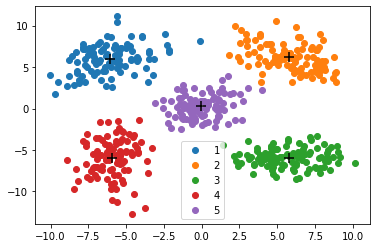

Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
Top 2 rate :  1.0
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  98 │   0 │   0 │   0 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │ 100 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │  99 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   1 │   0 │   0 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


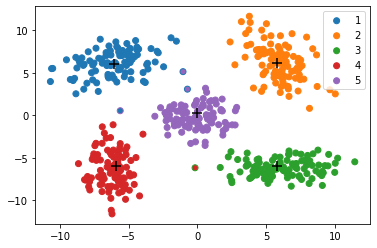

In [6]:
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp1_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "euclidian"
gaussian_model.test_model(split_data_tp1_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()


L'analyse du jeu de données d'apprentissage avec la position de chaque classe représenté en par les croix noires montre une répartition bien visible. L'analyse du jeux de test montre un taux de Top 1 de 99,2% et de Top 2 de 100%. On peut donc en déduire que la méthode de l'estimation gaussienne avec distance euclidienne prédit de manière efficace les classes. Sur les 500 classes à prédire 496 sont bien classés.
Le deuxième graphique représente le jeu de données tests avec les classes en croix noires. Les couleurs des points représentent les classes prédites et les contours représentent les classes théoriques. On remarque que les 4 classes mal placées sont des classes qui peuvent être considéré comme des outliers, car posisitionné entre deux groupes de classes. 

### Dataset 2

Gaussian model created
Classes centers created
Class = 1 has a center = [4.884009160000003, -4.993250990000002]
Class = 2 has a center = [5.021350009999999, 5.22781893]
Class = 3 has a center = [0.03402201000000008, -0.16684774000000008]
Class = 4 has a center = [-4.679924409999999, 4.945550710000001]
Class = 5 has a center = [-4.977598800000001, -5.127728420000003]


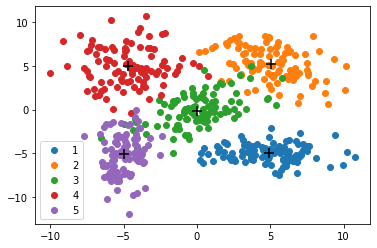

Results :
----------------

Top results :
----------------
Top 1 rate :  0.946
Top 2 rate :  0.996
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │ 100 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   2 │  97 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   5 │  84 │   1 │  10 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   6 │  94 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   2 │   0 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


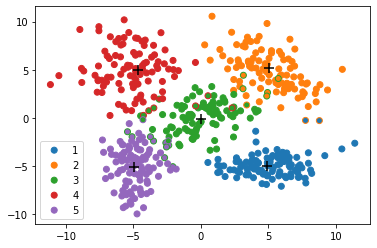

In [7]:
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp2_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "euclidian"
gaussian_model.test_model(split_data_tp2_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()

Comme précédement on remarque que les centres de classes sont bien positionnés par rapport aux classes. Comparé au précédent dataset les résultats sont un peu moins bon avec seulement 94% en Top 1. Lorsque l'on regarde la matrice de confusion on remarque que la classe numéro 3 est la classe la moins bien classée. En analysant le graphique on remarque la classe 3 (verte) a de nombreux points proche des centres de classes 5 et 2. De plus on remarque que les 6 points mal classés de la classe 4 sont placé dans la classe 3. La méthode est donc un peu moins bonne lorsque les données se chevauchent.  

### Dataset 3

Gaussian model created
Classes centers created
Class = 1 has a center = [-0.18975552999999987, 0.16551614999999997]
Class = 2 has a center = [2.8317632400000003, 3.1425455499999995]
Class = 3 has a center = [-2.743207609999999, 2.7806047900000017]
Class = 4 has a center = [-3.0896952, -3.1509188299999993]
Class = 5 has a center = [2.9589284900000004, -2.8782988199999995]


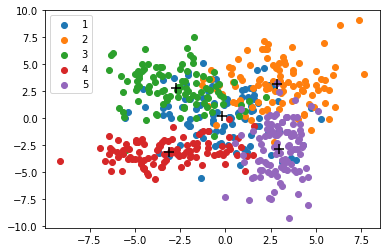

Results :
----------------

Top results :
----------------
Top 1 rate :  0.728
Top 2 rate :  0.892
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  43 │  17 │  16 │  12 │  12 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  12 │  83 │   3 │   0 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  16 │   4 │  78 │   2 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  16 │   0 │   7 │  74 │   3 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   5 │   9 │   0 │   0 │  86 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


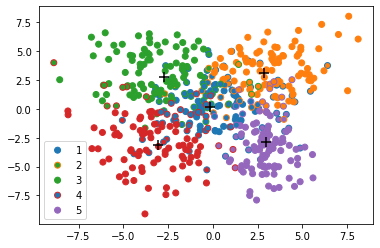

In [8]:
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp3_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "euclidian"
gaussian_model.test_model(split_data_tp3_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()

Pour le dataset 3 on remarque que les différentes classes sont mélangé car les plages de valeurs sont plus larges. Le résultat en Top 1 est de seulement 73%, et le Top 2 ne monte qu'à 89% soit moins que les deux autres datasets. Lorsque l'on étudie la matrice de confusion, on remarque que la classe la moins bien classé avec seulement 43% de bon est la classe 1. En comparant avec le graphique on remarque que la classe 1 est au centre des quatre autres. Donc ces points ce mélange avec ces classes, comme on peut le voir dans la matrice. Les résultats des autres classes sont meilleurs car elles ont de nombreux points à l'extérieur des classes, donc sans ambiguité. 

### Distance de mahalanobis

#### Dataset 1

Gaussian model created
Classes centers created
Class = 1 has a center = [-6.10093065, 5.99640958]
Class = 2 has a center = [5.79953605, 6.171171379999997]
Class = 3 has a center = [5.776998600000001, -5.925827230000001]
Class = 4 has a center = [-5.924998090000001, -6.013923480000001]
Class = 5 has a center = [-0.013581480000000043, 0.2513897700000001]


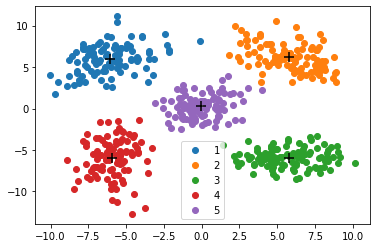

Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
Top 2 rate :  1.0
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  98 │   0 │   0 │   0 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │ 100 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │  99 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   1 │   0 │   0 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


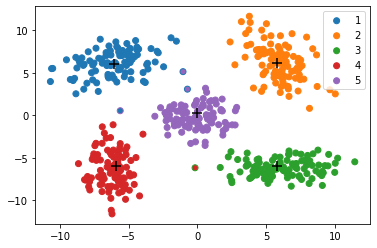

In [9]:
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp1_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "mahalanobis"
gaussian_model.test_model(split_data_tp1_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()

Gaussian model created
Classes centers created
Class = 1 has a center = [4.884009160000003, -4.993250990000002]
Class = 2 has a center = [5.021350009999999, 5.22781893]
Class = 3 has a center = [0.03402201000000008, -0.16684774000000008]
Class = 4 has a center = [-4.679924409999999, 4.945550710000001]
Class = 5 has a center = [-4.977598800000001, -5.127728420000003]


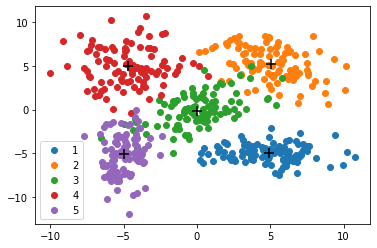

Results :
----------------

Top results :
----------------
Top 1 rate :  0.946
Top 2 rate :  0.996
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │ 100 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   2 │  97 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   5 │  84 │   1 │  10 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   6 │  94 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   2 │   0 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


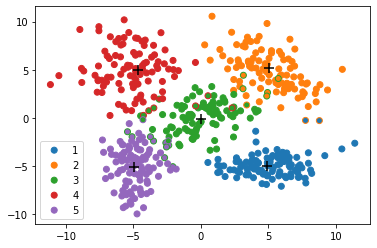

In [10]:
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp2_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "mahalanobis"
gaussian_model.test_model(split_data_tp2_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()

Gaussian model created
Classes centers created
Class = 1 has a center = [-0.18975552999999987, 0.16551614999999997]
Class = 2 has a center = [2.8317632400000003, 3.1425455499999995]
Class = 3 has a center = [-2.743207609999999, 2.7806047900000017]
Class = 4 has a center = [-3.0896952, -3.1509188299999993]
Class = 5 has a center = [2.9589284900000004, -2.8782988199999995]


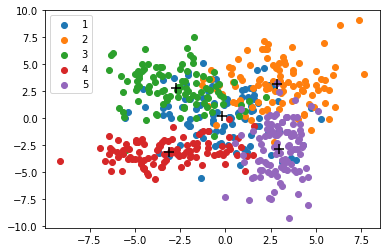

Results :
----------------

Top results :
----------------
Top 1 rate :  0.728
Top 2 rate :  0.894
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  43 │  17 │  16 │  12 │  12 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  12 │  83 │   3 │   0 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  16 │   4 │  78 │   2 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  16 │   0 │   7 │  74 │   3 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   5 │   9 │   0 │   0 │  86 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


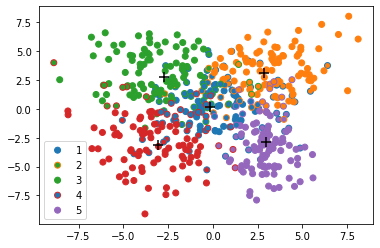

In [11]:
gaussian_model = GaussianModel()
gaussian_model.gaussian_fit_model(split_data_tp3_app)
gaussian_model.print_classes_centers()
gaussian_model.plot_train_data()
gaussian_model.compute_method = "mahalanobis"
gaussian_model.test_model(split_data_tp3_dec)
gaussian_model.print_model_result()
gaussian_model.plot_test_data()

La deuxième analyse réalisée sur les 3 datasets avec l'utilisation de la distance de Mahalanobis n'améliore pas les résultats de Top 1 et un tout petit peu ceux de Top 2 pour le dataset numéro 3. Donc utiliser une distance de Mahalanobis peu être recommandé pour des données moins bien discriminé. Et couplé avec une méthode de bagging. 

### Comparaison avec scikit learn


In [12]:
# from sklearn.mixture import GaussianMixture
# gm = GaussianMixture(n_components=2, random_state=0).fit(X)
# gm.predict([[0, 0], [12, 3]])


## K plus proches voisins

### Analyse à 1ppv

#### Dataset 1

K set to 1
Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  99 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │ 100 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   1 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


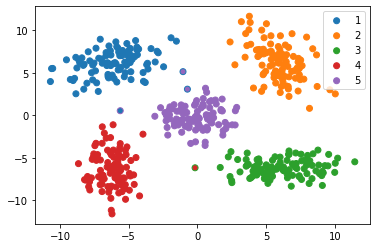

In [13]:
kppv = KppvModel()
kppv.k = 1
kppv.vote_method = "unanimous"
kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
kppv.print_model_result()
kppv.plot_test_data()

#### Dataset 2

K set to 1
Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.92
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │ 100 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  89 │  11 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   2 │   4 │  83 │   2 │   9 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   3 │  96 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   7 │   1 │  92 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


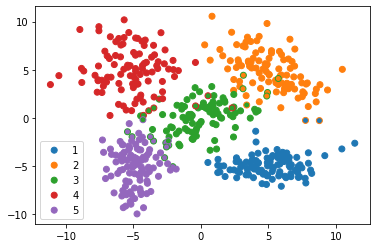

In [14]:
kppv = KppvModel()
kppv.k = 1
kppv.vote_method = "unanimous"
kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
kppv.print_model_result()
kppv.plot_test_data()

#### Dataset 3

K set to 1
Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.646
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  34 │  20 │  19 │  14 │  13 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  14 │  76 │   4 │   1 │   5 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  24 │   4 │  71 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  19 │   2 │  12 │  65 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │  15 │   7 │   1 │   0 │  77 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


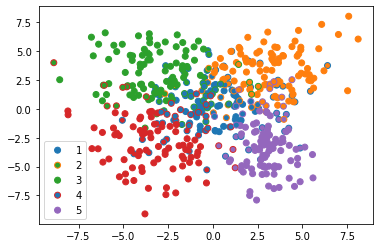

In [15]:
kppv = KppvModel()
kppv.k = 1
kppv.vote_method = "unanimous"
kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
kppv.print_model_result()
kppv.plot_test_data()

### kppv avec cross-validation

#### Dataset 1

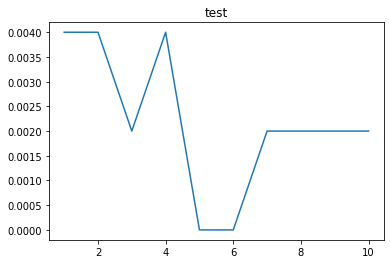

The best k found is 5 with a error rate = 0.0
K set to 5
Will use k = 5 neighbours


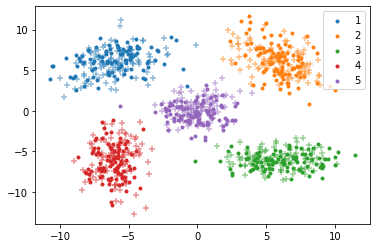

Results :
----------------

Top results :
----------------
Top 1 rate :  0.996
Top 2 rate :  0.996
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  99 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │ 100 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   1 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------
5


In [19]:
kppv = KppvModel()
kppv.vote_method = "majority"
kppv.get_k_cross_validation(split_data_tp1_app, 10, 5)
kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
kppv.print_model_result()
kppv.plot_test_data()

In [ ]:
kppv = KppvModel()
kppv.vote_method = "unanimous"
kppv.get_k_cross_validation(split_data_tp1_app, 10, 5)
kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
kppv.print_model_result()
kppv.plot_test_data()

#### Dataset 2

In [ ]:
kppv = KppvModel()
kppv.vote_method = "majority"
kppv.get_k_cross_validation(split_data_tp2_app, 10, 5)
kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
kppv.print_model_result()
kppv.plot_test_data()

In [ ]:
kppv = KppvModel()
kppv.vote_method = "unanimous"
kppv.get_k_cross_validation(split_data_tp2_app, 10, 5)
kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
kppv.print_model_result()
kppv.plot_test_data()

#### Dataset 3

In [ ]:
kppv = KppvModel()
kppv.vote_method = "majority"
kppv.get_k_cross_validation(split_data_tp3_app, 10, 5)
kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
kppv.print_model_result()
kppv.plot_test_data()

In [ ]:
kppv = KppvModel()
kppv.vote_method = "unanimous"
kppv.get_k_cross_validation(split_data_tp3_app, 10, 5)
kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
kppv.print_model_result()
kppv.plot_test_data()

### Comparaison avec scikit-learn

In [17]:
# parzen = ParzenModel()
# h_list = np.arange(0.2, 2, 0.1)
# parzen.method = "gaussian"
# parzen.get_h_cross_validation(split_data_tp1_app, h_list, 5)
# parzen.compute_parzen(split_data_tp1_app, split_data_tp1_dec)
# parzen.print_model_result()

In [18]:
# linear = LinearSeparationModel()
# model = linear.linear_train(split_data_tp1_app, True)
# linear.print_model()
# linear.test_linear_model(split_data_tp1_dec, model)
# linear.print_model_result()
# linear.plot_test_data()